In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine=engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x232d6f789c8>,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [10]:
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x232d6f86588>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
mostRecent = session.query(measurement).order_by(measurement.date.desc()).first()

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
mostRecent.date

'2017-08-23'

In [13]:
# Calculate the date one year from the last date in data set.
yearBefore = dt.date(2017, 8 ,23) - dt.timedelta(days=365)

In [14]:
# Perform a query to retrieve the data and precipitation scores
lastYear = session.query(measurement.date, measurement.prcp).filter(measurement.date >= yearBefore).order_by(measurement.date).all()

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(lastYear)
prcp_df = prcp_df.set_index('date')

In [16]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='date')

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


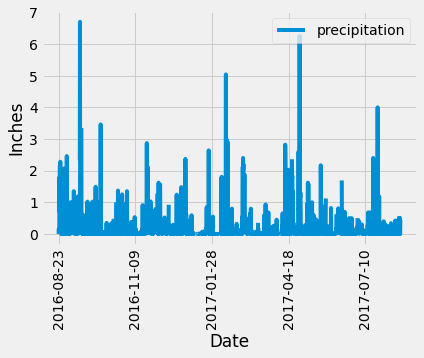

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df = prcp_df.rename(columns={'prcp':"precipitation"})
plot = prcp_df.plot(rot=90)
plot.set_ylabel("Inches")
plot.set_xlabel("Date")
plt.legend(loc='upper right')

# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
distinctStations = session.query(station.station).distinct().count()
distinctStations

9

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
mostActive = session.query(measurement.station,func.count(measurement.station).label('Count')
    ).group_by(measurement.station).order_by(desc('Count'))
mostActive[0].station

'USC00519281'

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest = session.query(func.min(measurement.tobs)).filter(measurement.station==mostActive[0].station).first()
highest = session.query(func.max(measurement.tobs)).filter(measurement.station==mostActive[0].station).first()
average = session.query(func.avg(measurement.tobs)).filter(measurement.station==mostActive[0].station).first()

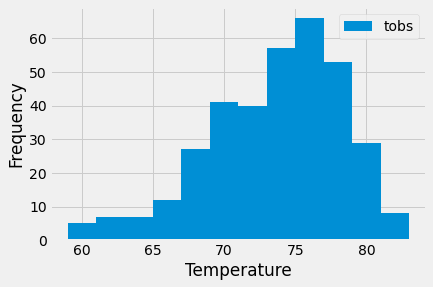

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
lastYearTOBS = session.query(measurement.date, measurement.tobs
    ).filter(measurement.station==mostActive[0].station).filter(measurement.date >= yearBefore).order_by(measurement.date).all()
tobs_df = pd.DataFrame(lastYearTOBS)
tobs_df = tobs_df.set_index('date')
tobs_df = tobs_df.sort_values(by='date')
tobs_plot = tobs_df.plot(kind='hist', bins=12)
tobs_plot.set_xlabel("Temperature")
plt.legend(loc='upper right')


# Close session

In [22]:
# Close Session
session.close()